# Dataset Analysis
Authors: Sophie Zhao, Tolya Evdokimov

In this notebook, we generate the dataset class counts and the summary figure for each split. First, we will import the necessary libraries.

In [1]:
import tensorflow as tf
import sys
import matplotlib.pyplot as plt

sys.path.append('../src/')

from data.utils import preprocess_dataset

Load in the data and preprocess using our data utility

In [2]:
raw_train = tf.data.TFRecordDataset("../dataset/train.tfrecords")
raw_valid = tf.data.TFRecordDataset("../dataset/valid.tfrecords")
raw_test = tf.data.TFRecordDataset("../dataset/test.tfrecords")

train = preprocess_dataset(raw_train, sum(1 for _ in raw_train))
test = preprocess_dataset(raw_test, sum(1 for _ in raw_test))
valid = preprocess_dataset(raw_valid, sum(1 for _ in raw_valid))

Now, we will count the number of pixels in each dataset per each class. We use <code>tf.reduce_sum()</code> to calculate the total number of classes in the test dataset.

In [3]:
# count the number of each pixel class in the segmented y label image with labels 0 through 6
def count_pixels(dataset):
    counts = [0] * 7
    for _, y in dataset:
        y = y['conv2d_18']
        y = tf.reshape(y, (-1, 7))
        y = tf.argmax(y, axis=1)
        for i in range(7):
            counts[i] += tf.reduce_sum(tf.cast(tf.equal(y, i), tf.int32))
    return counts

count_train = count_pixels(train)
count_valid = count_pixels(valid)
count_test = count_pixels(test)

train_c = [x.numpy() for x in count_train]
valid_c = [x.numpy() for x in count_valid]
test_c = [x.numpy() for x in count_test]

Create the bar plot of the each of the counts

<Figure size 3000x3000 with 0 Axes>

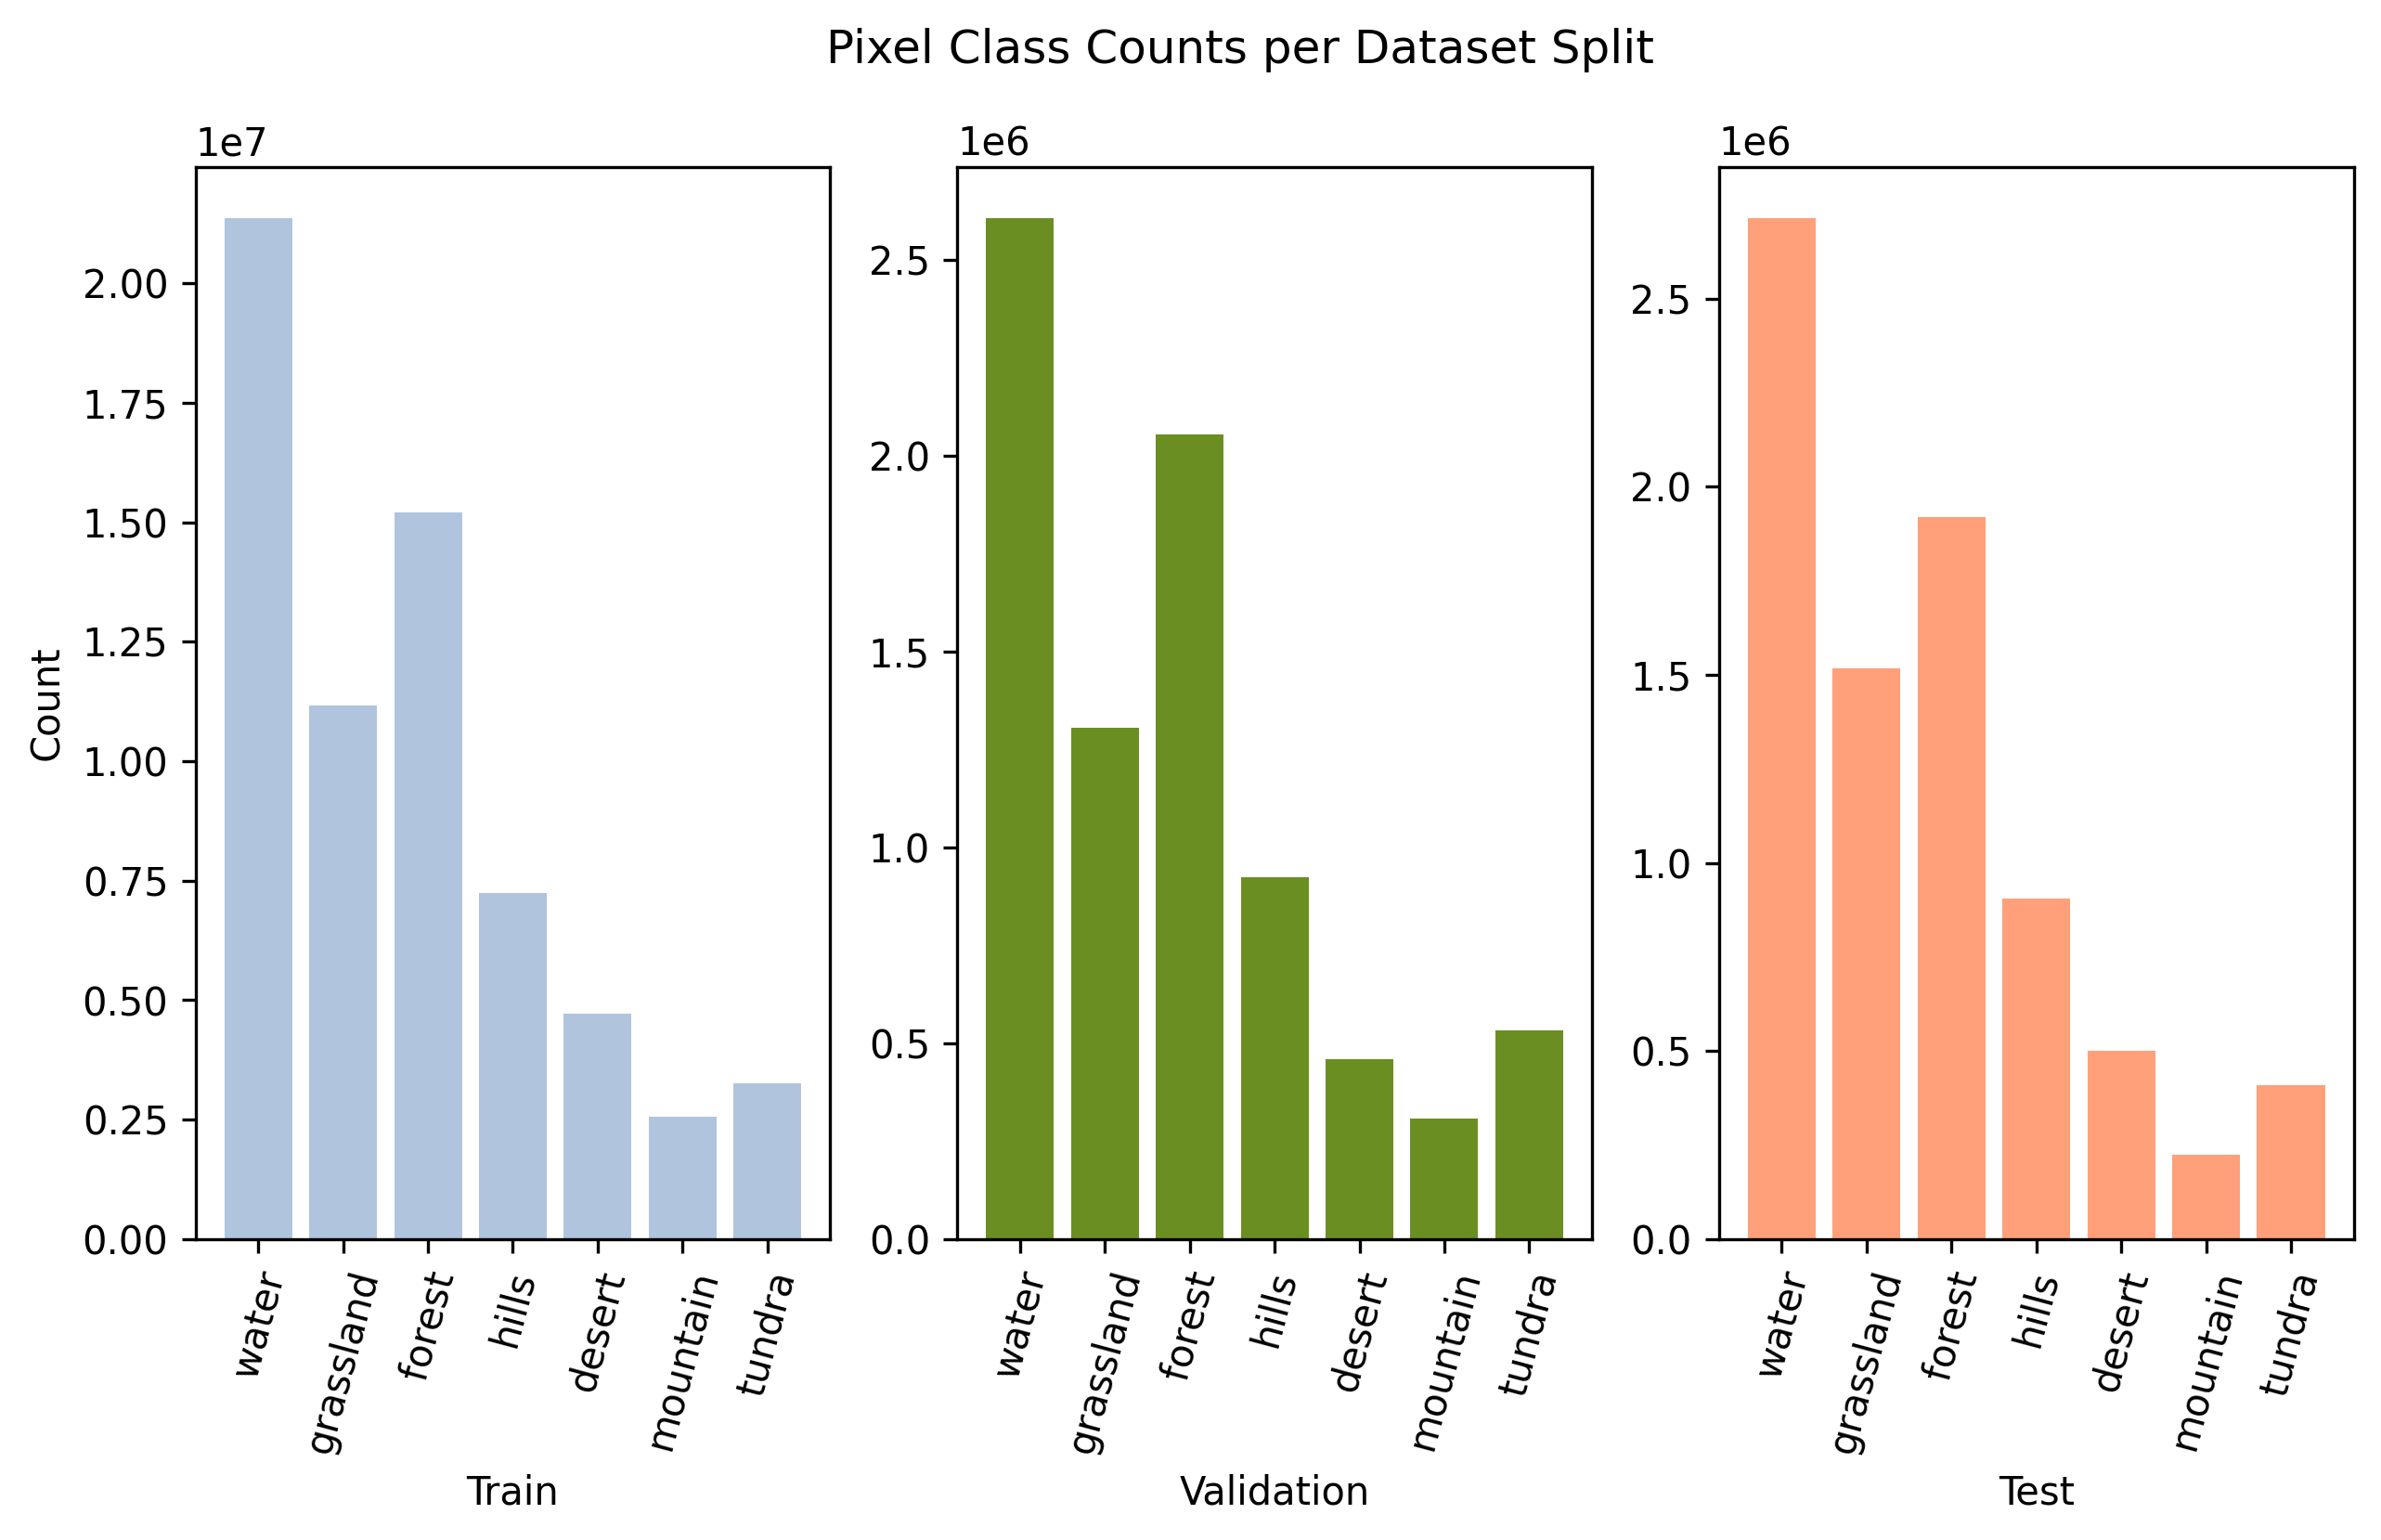

In [4]:
plt.figure(figsize=(10,10),dpi=300)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), dpi=300)
ax[0].bar(range(7), train_c, color='lightsteelblue', label='train')
ax[1].bar(range(7), valid_c, color='olivedrab', label='valid')
ax[2].bar(range(7), test_c, color='lightsalmon', label='test')

ax[0].set_xticks(range(7))
ax[1].set_xticks(range(7))
ax[2].set_xticks(range(7))

class_labels = ['water', 'grassland', 'forest', 'hills', 'desert', 'mountain', 'tundra']

ax[0].set_xticklabels(class_labels, rotation=75)
ax[1].set_xticklabels(class_labels, rotation=75)
ax[2].set_xticklabels(class_labels, rotation=75)


fig.suptitle('Pixel Class Counts per Dataset Split')
ax[0].set_xlabel('Train')
ax[1].set_xlabel('Validation')
ax[2].set_xlabel('Test')
ax[0].set_ylabel('Count')
plt.show()